In [31]:
import numpy as np
from sklearn.datasets import load_boston
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [59]:
data=load_boston()
#CRIM per capita crime rate by town---AGE proportion of owner-occupied units built prior to 1940
X=data.data[0:,[0,6]]
Y=data.target

In [60]:
class Adaline:
    def __init__(self):
        pass
    def fit(self,x_train,y_train):
        # m=(X.T*X)^-1*X.T*Y
        self.m=np.matmul(inv(np.matmul(x_train.T, x_train)), np.matmul(x_train.T, y_train))
        return self.m
    def evaluate(self):
        pass
    def predict(self, x_test):
        y_predict = np.matmul(x_test, self.m)
        return y_predict

In [61]:
model=Adaline()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=4)
model.fit(X_train,Y_train)
y_pr=model.predict(X_test)

(127, 127)


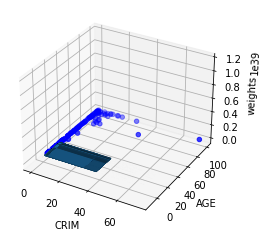

In [178]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_test[:,0],X_test[:,1],y_pr, c='blue')
Y=y_pr.reshape(127,1)
#Z = a1 * X + a2 * Y + c
#Z= 0.5*np.abs(np.dot(X,np.roll(Y,1))-np.dot(Y,np.roll(X,1)))
# Z=X*model.m[0]+Y*model.m[1]
Z= X*np.exp(X - Y)
print(Z.shape)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('CRIM')
ax.set_ylabel('AGE')
ax.set_zlabel('weights')

plt.show()


(127, 2)
(127, 3)


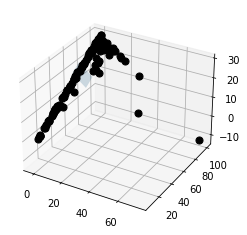

In [179]:
from skspatial.objects import Plane
from skspatial.objects import Points
from skspatial.plotting import plot_3d

X=np.array(X,dtype='int')
Y=np.array(Y,dtype='int')
p=np.concatenate((X_test,Y),axis=1)
print(X_test.shape)
print(p.shape)
points = Points(p)
plane = Plane.best_fit(points)
plot_3d(
    points.plotter(c='k', s=50, depthshade=False),
    plane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
)
ax.view_init(-80, 60)

In [ ]:
#MAE
#MSE